In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('medical_examination.csv', index_col=0, sep=',')

In [8]:
print(df.head())

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  


In [9]:
#first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
#If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

df['overweight'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = np.where(df['overweight']>25, 1, 0) #if value over 25 return 1, else retun 0
print(df['overweight'])

id
0        0
1        1
2        0
3        1
4        0
        ..
99993    1
99995    1
99996    1
99998    1
99999    0
Name: overweight, Length: 70000, dtype: int64


In [10]:
# Normalize data by making 0 always good and 1 always bad. 
#If the value of 'cholestorol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1.
df['cholesterol'] = np.where(df['cholesterol']==1, 0, 1)
df['gluc'] = np.where(df['gluc']==1, 0, 1)
print(df.head())

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            0     0      0   
1   20228       1     156    85.0    140     90            1     0      0   
2   18857       1     165    64.0    130     70            1     0      0   
3   17623       2     169    82.0    150    100            0     0      0   
4   17474       1     156    56.0    100     60            0     0      0   

    alco  active  cardio  overweight  
id                                    
0      0       1       0           0  
1      0       1       1           1  
2      0       0       1           0  
3      0       1       1           1  
4      0       0       0           0  


In [237]:
    # Create DataFrame for cat plot using `pd.melt` using just the values from
    #'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    # age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke alco  active  cardio  overweight
  
    df_cat = df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
    print(df_cat)

        cardio     variable  value
0            0  cholesterol      1
1            1  cholesterol      0
2            1  cholesterol      0
3            1  cholesterol      1
4            0  cholesterol      1
...        ...          ...    ...
419995       0   overweight      1
419996       1   overweight      1
419997       1   overweight      1
419998       1   overweight      1
419999       0   overweight      0

[420000 rows x 3 columns]


In [107]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat['total'] = 0
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
#df_cat = df_cat.groupby(['cardio', 'variable']).count()
print(df_cat)

    cardio     variable  value  total
0        0       active      0   6378
1        0       active      1  28643
2        0         alco      0  33080
3        0         alco      1   1941
4        0  cholesterol      0  29330
5        0  cholesterol      1   5691
6        0         gluc      0  30894
7        0         gluc      1   4127
8        0   overweight      0  15915
9        0   overweight      1  19106
10       0        smoke      0  31781
11       0        smoke      1   3240
12       1       active      0   7361
13       1       active      1  27618
14       1         alco      0  33156
15       1         alco      1   1823
16       1  cholesterol      0  23055
17       1  cholesterol      1  11924
18       1         gluc      0  28585
19       1         gluc      1   6394
20       1   overweight      0  10539
21       1   overweight      1  24440
22       1        smoke      0  32050
23       1        smoke      1   2929


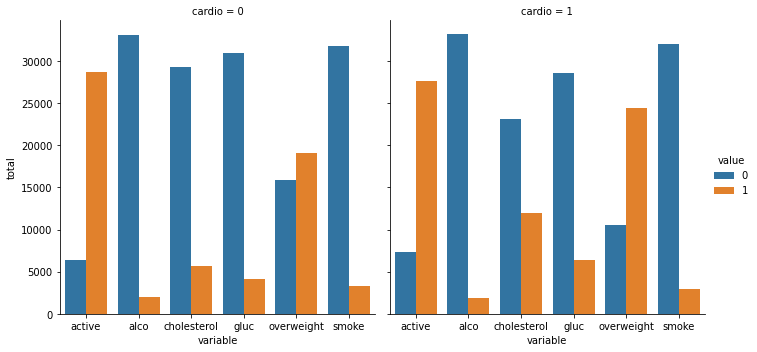

In [108]:
#(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, 
#estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, 
#seed=None, order=None, hue_order=None, row_order=None, col_order=None, 
#kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, 
#legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

#g = sns.FacetGrid(df_cat, col="cardio")
#g.map(sns.catplot, data=df_cat, x="variable", y="total", col="cardio", orient="v")
#g.map(data=df_cat, row="variable", col="total", kind="bar")
sns.catplot(
    data=df_cat, 
    x="variable", 
    y="total", 
    col="cardio",
    hue="value",
    kind="bar",
    legend_out=True,
)

In [14]:
#print(df[df['cardio'] == 1])
cardio_0 = df[df['cardio'] == 0]
print('ch 0', cardio_0['cholesterol'].sum(), cardio_0['cholesterol'].isin([0]).sum(), len(cardio_0))
cardio_0_sums_1 = [cardio_0['cholesterol'].sum(), cardio_0['gluc'].sum(), cardio_0['smoke'].sum(), cardio_0['alco'].sum(), cardio_0['active'].sum(), cardio_0['overweight'].sum()]
cardio_0_sums_0 = [
    cardio_0['cholesterol'].isin([0]).sum(),
    cardio_0['gluc'].isin([0]).sum(),
    cardio_0['smoke'].isin([0]).sum(),
    cardio_0['alco'].isin([0]).sum(),
    cardio_0['active'].isin([0]).sum(),
    cardio_0['overweight'].isin([0]).sum()]

#cardio_0_reduced = cardio_0[cardio_0['cholesterol','gluc','smoke','alco','active','overweight']]
sumTable = pd.DataFrame([cardio_0_sums_1, cardio_0_sums_0] ,columns=['cholesterol','gluc','smoke','alco','active','overweight'])
print(sumTable)

ch 0 5691 29330 35021
   cholesterol   gluc  smoke   alco  active  overweight
0         5691   4127   3240   1941   28643       19106
1        29330  30894  31781  33080    6378       15915


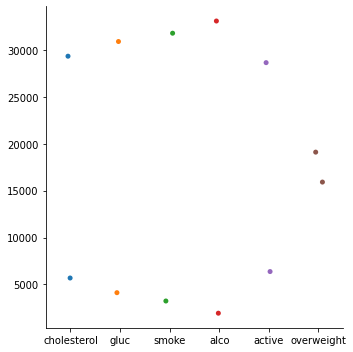

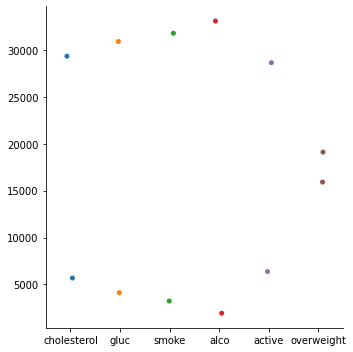

In [15]:
sns.catplot(data=sumTable)
sns.catplot(data=sumTable);

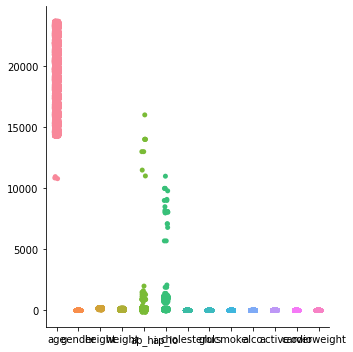

In [12]:
sns.catplot(data=df)

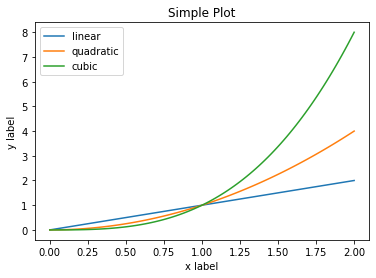

In [11]:
x = np.linspace(0, 2, 100) #makes like a fake array from 0 - 2 with 100 points between

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.